<a href="https://colab.research.google.com/github/Swepstarling0/InteligenciaArtificial24/blob/main/Convolutional_Neural_Netweork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convolutional Neural Network

*   Fernando Alvarez Cisneros 1952884
*   Mariana Marcela Sepulveda Sanchez 1925531
*   Alejandra Michelle Gutierrez Melchor 197348


Librerias

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Pre procesamiento

In [7]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


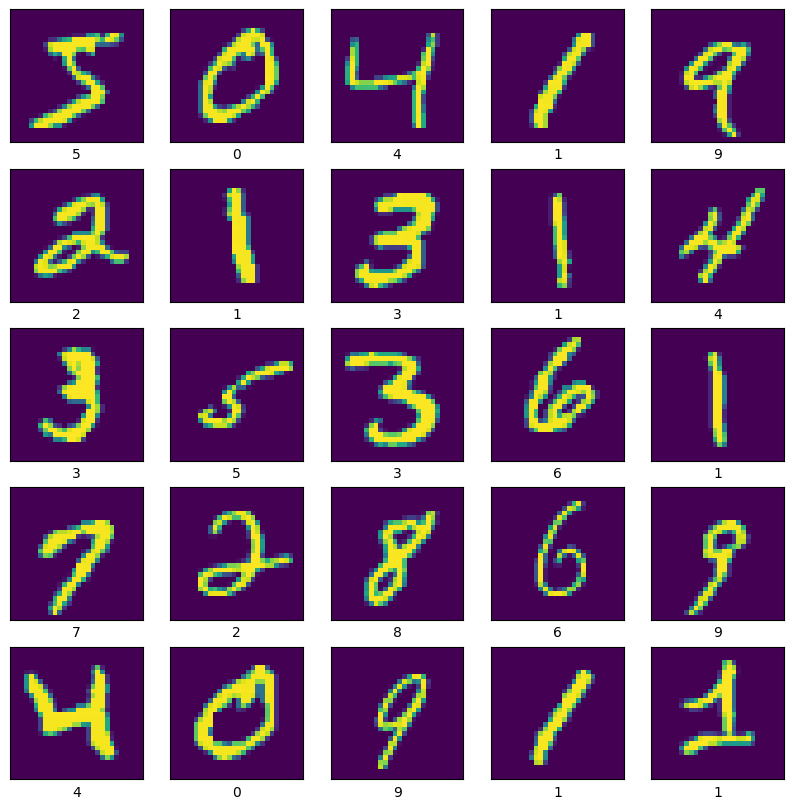

In [9]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Convolutional Netwrok

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


# Learning part
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))


# Model Compliation: Features
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])




In [15]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

Train Model

In [16]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 54s 28ms/step - loss: 0.1507 - accuracy: 0.9536 - val_loss: 0.0424 - val_accuracy: 0.9869
Epoch 2/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0475 - accuracy: 0.9851 - val_loss: 0.0378 - val_accuracy: 0.9874
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0338 - accuracy: 0.9894 - val_loss: 0.0318 - val_accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0251 - accuracy: 0.9922 - val_loss: 0.0339 - val_accuracy: 0.9884
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0195 - accuracy: 0.9934 - val_loss: 0.0287 - val_accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0159 - accuracy: 0.9952 - val_loss: 0.0302 - val_accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0132 - accuracy: 0.9956 - val_loss: 0.0277 - val_accura

313/313 - 2s - loss: 0.0458 - accuracy: 0.9894 - 2s/epoch - 7ms/step


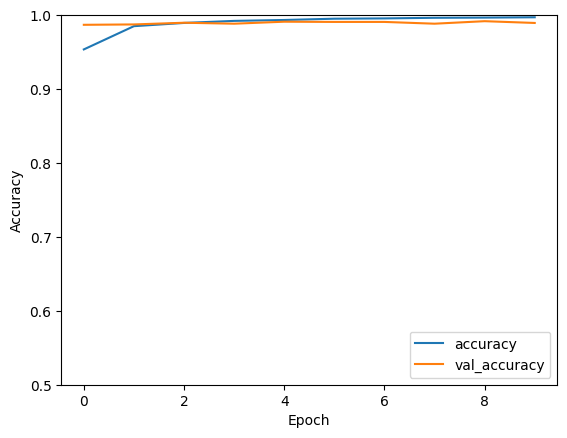

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Model testing

In [22]:
predictions = model.predict(test_images)


x = predictions[1]
y = test_labels[1]

313/313 [==============================] - 3s 10ms/step


In [26]:
x = np.argmax(x)
print(x,y)

2 2


In [28]:
x = predictions[40]
y = test_labels[40]
x = np.argmax(x)
print(x,y)

1 1


In [29]:
x = predictions[58]
y = test_labels[58]
x = np.argmax(x)
print(x,y)

9 9


In [30]:
x = predictions[90]
y = test_labels[90]
x = np.argmax(x)
print(x,y)

3 3


In [31]:
x = predictions[255]
y = test_labels[255]
x = np.argmax(x)
print(x,y)

7 7
